<a href="https://colab.research.google.com/github/songqsh/foo1/blob/master/src/linreg_torch_v01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [0]:
'''
Create data
'''

batch_size = 50

#Cook data using these param
#Use regression on data to find param back
bias_param = 5.
weight_param = 2.

x_train = torch.linspace(0, batch_size-1, batch_size).reshape(batch_size, 1)
y_train = bias_param + weight_param * x_train
y_train += torch.randn(batch_size,1)*3.0


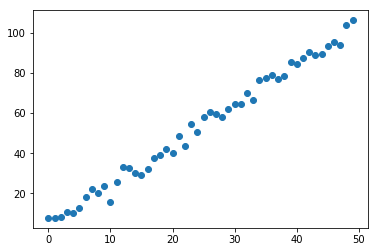

In [3]:
plt.scatter(x_train.numpy(), y_train.numpy())

__Linear Algebra__

In [0]:
A = torch.cat((torch.ones(batch_size,1), x_train), 1)

In [0]:
bw, LU = torch.solve(A.t()@y_train, A.t()@A)
bias = bw[0]
weight = bw[1]

In [0]:
y_pred = bias + weight*x_train

bias:[4.03428] and weight:[2.0122855]


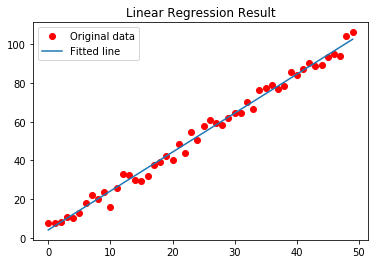

In [7]:
plt.plot(x_train.numpy(), y_train.numpy(), 'ro', label ='Original data')
plt.plot(x_train.numpy(), y_pred.numpy(), label ='Fitted line')
print('bias:'+str(bias.numpy())+' and weight:'+ str(weight.numpy()))
plt.title('Linear Regression Result') 
plt.legend() 
plt.show()

__Torch nn__

We implement linear regression by torch,.nn

In [0]:
# Hyper-parameters
input_size = 1
output_size = 1
num_epochs = 5000
learning_rate = 0.001

# Linear regression model
model = nn.Linear(input_size, output_size)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

In [9]:
# Train the model
for epoch in range(num_epochs):

    # Forward pass
    outputs = model(x_train)
    loss = criterion(outputs, y_train)
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 200 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))



Epoch [200/5000], Loss: 11.7373
Epoch [400/5000], Loss: 11.1477
Epoch [600/5000], Loss: 10.6677
Epoch [800/5000], Loss: 10.2771
Epoch [1000/5000], Loss: 9.9592
Epoch [1200/5000], Loss: 9.7004
Epoch [1400/5000], Loss: 9.4898
Epoch [1600/5000], Loss: 9.3184
Epoch [1800/5000], Loss: 9.1789
Epoch [2000/5000], Loss: 9.0654
Epoch [2200/5000], Loss: 8.9730
Epoch [2400/5000], Loss: 8.8978
Epoch [2600/5000], Loss: 8.8366
Epoch [2800/5000], Loss: 8.7867
Epoch [3000/5000], Loss: 8.7462
Epoch [3200/5000], Loss: 8.7132
Epoch [3400/5000], Loss: 8.6863
Epoch [3600/5000], Loss: 8.6645
Epoch [3800/5000], Loss: 8.6467
Epoch [4000/5000], Loss: 8.6322
Epoch [4200/5000], Loss: 8.6204
Epoch [4400/5000], Loss: 8.6108
Epoch [4600/5000], Loss: 8.6030
Epoch [4800/5000], Loss: 8.5966
Epoch [5000/5000], Loss: 8.5915


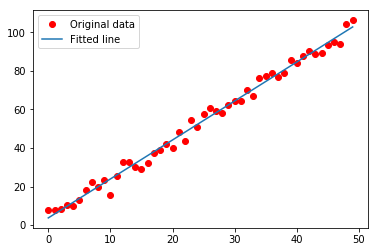

In [10]:
# Plot the graph
#predicted = model(torch.from_numpy(x_train)).detach().numpy()
predicted = model(x_train).detach().numpy()
plt.plot(x_train.numpy(), y_train.numpy(), 'ro', label='Original data')
plt.plot(x_train.numpy(), predicted, label='Fitted line')
plt.legend()
plt.show()

In [11]:
# Print model's state_dict
print("Model's state_dict:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor])

Model's state_dict:
weight 	 tensor([[2.0213]])
bias 	 tensor([3.7380])


In [12]:
print('loss from linear algebra is:', criterion(y_pred, y_train).numpy())

loss from linear algebra is: 8.56884
